<img src="./images/banner.png" width="100%" align="left" />

<table style="float:right;">
    <tr>
        <td>                      
            <div style="text-align: right"><a href="https://alandavies.netlify.com" target="_blank">Dr Alan Davies</a></div>
            <div style="text-align: right">Senior Lecturer Health Data Science</div>
            <div style="text-align: right">University of Manchester</div>
         </td>
         <td>
             <img src="./images/alan.png" width="30%" />
         </td>
     </tr>
</table>

# 2.0 Data visualisation for exploratory data analysis in R
****

#### About this Notebook
This notebook introduces the concepts of exploratory data analysis using visualisations.

<div class="alert alert-block alert-warning"><b>Learning Objectives:</b> 
<br/> At the end of this notebook you will be able to:
  
- LO9	Practice plotting data using appropriate visualisation types, including static and dynamic (interactive) forms of visualisation using modern graph libraries in languages like R and Python
 
- LO3 Recognise the difference between using data visualisations for exploration and for explanation 
    
- LO6	Interpret characteristics of data by using data visualisations

- LO4	Discuss issues surrounding poor presentation of data via visualisations including intentional and unintentional misleading and confusion about the nature of underlying data


</div> 

<a id="top"></a>

<b>Table of contents</b><br>

2.1 [Dataset characteristics](#char)

2.2 [The distribution of a dataset](#explore)

2.3 [Meaningful visualisations](#meaning)

2.4 [Visualising relationships](#corr)

2.5 [Dealing with outliers](#out)

2.6 [Error bars](#error)

One of the first things many people do when they obtain a dataset is to explore its characteristics. This can be achieved using various inbuilt functions that can describe characteristics of a dataset in terms of the number of rows and columns, missing data, space taken up on disk, the types of variables and statistical qualities using functions such as <code>summary</code> and <code>str</code>. In this notebook we will explore ways of exploring the quality and characteristics of data using visualisations.

<a id="char"></a>
#### 2.1 Dataset characteristics

Here is a short reminder of some of the functions that can be used to explore the characteristics of dataframes in summary and tabular form before we move on to look at how we can use visualisations to take this further.

First we will load the <code>tidyverse</code> library.

In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()


Next we can load in a dataset to view the properties of the data using textual and numerical data.

In [2]:
vc_data <- read_csv("./data/vaccines.csv")

Parsed with column specification:
cols(
  `Clinic proceedures` = col_character(),
  `Clinic site` = col_character(),
  Prices = col_double()
)


The <code>str</code> function is useful for a compact summary that includes column names, their data types (e.g. <code>chr</code> (characters) for textual data and <code>num</code> for numerical data.

In [3]:
str(vc_data)

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	20 obs. of  3 variables:
 $ Clinic proceedures: chr  "Malaria" "India Package" "Africa Package" "Central America Package" ...
 $ Clinic site       : chr  "A" "A" "B" "A" ...
 $ Prices            : num  85 165 220 165 235 85 145 85 145 85 ...
 - attr(*, "spec")=
  .. cols(
  ..   `Clinic proceedures` = col_character(),
  ..   `Clinic site` = col_character(),
  ..   Prices = col_double()
  .. )


To explore the statistical properties the <code>summary</code> function can be used.

In [4]:
summary(vc_data)

 Clinic proceedures Clinic site            Prices     
 Length:20          Length:20          Min.   : 75.0  
 Class :character   Class :character   1st Qu.: 85.0  
 Mode  :character   Mode  :character   Median : 85.0  
                                       Mean   :119.0  
                                       3rd Qu.:146.2  
                                       Max.   :235.0  

To see how many rows a dataframe has, we can use the <code>nrow</code> function. Here we can see there are <code>20</code> rows/records.

In [5]:
nrow(vc_data)

[1] 20

The <code>dim</code> function show the dimensions (rows and columns).

In [6]:
dim(vc_data)

[1] 20  3

We can also view other details like the column names:

In [7]:
colnames(vc_data)

[1] "Clinic proceedures" "Clinic site"        "Prices"

Let's load in a different dataset for a quick task:

In [8]:
applicant_data <- read_csv("./data/applicant_data.csv")
head(applicant_data, 5)

Parsed with column specification:
cols(
  Sex = col_character(),
  Age = col_double(),
  Location = col_character(),
  Region = col_character()
)


Sex,Age,Location,Region
Male,44,UK,Suffolk
Female,30,UK,Greater London
Male,32,UK,Oxfordshire
Female,43,UK,Somerset
Female,38,UK,London


<div class="alert alert-block alert-info">
<b>Task 1:</b>
<br> 
Using these various functions, answer the following questions:
<ul>
    <li>What are the data types of the different variables?</li>
    <li>What is the mean (average) age?</li>
    <li>How many rows and columns are there in the dataset?</li>
    </ul>
</div>

In [11]:
str(applicant_data)

spec_tbl_df [54 x 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Sex     : chr [1:54] "Male" "Female" "Male" "Female" ...
 $ Age     : num [1:54] 44 30 32 43 38 39 41 34 29 38 ...
 $ Location: chr [1:54] "UK" "UK" "UK" "UK" ...
 $ Region  : chr [1:54] "Suffolk" "Greater London" "Oxfordshire" "Somerset" ...
 - attr(*, "spec")=
  .. cols(
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   Location = col_character(),
  ..   Region = col_character()
  .. )


In [12]:
summary(applicant_data)

     Sex                 Age          Location            Region         
 Length:54          Min.   :24.00   Length:54          Length:54         
 Class :character   1st Qu.:31.25   Class :character   Class :character  
 Mode  :character   Median :36.00   Mode  :character   Mode  :character  
                    Mean   :35.93                                        
                    3rd Qu.:41.00                                        
                    Max.   :53.00                                        

In [13]:
dim(applicant_data)

[1] 54  4

1. Sex = chr, Age = num, Location = chr, Region = chr
2. The mean age is 35.93 or 36 rounded up ($M = 35.93$)
3. There are 4 columns and 54 rows

Classes 'spec_tbl_df', 'tbl_df', 'tbl' and 'data.frame':	54 obs. of  4 variables:
 $ Sex     : chr  "Male" "Female" "Male" "Female" ...
 $ Age     : num  44 30 32 43 38 39 41 34 29 38 ...
 $ Location: chr  "UK" "UK" "UK" "UK" ...
 $ Region  : chr  "Suffolk" "Greater London" "Oxfordshire" "Somerset" ...
 - attr(*, "spec")=
  .. cols(
  ..   Sex = col_character(),
  ..   Age = col_double(),
  ..   Location = col_character(),
  ..   Region = col_character()
  .. )


     Sex                 Age          Location            Region         
 Length:54          Min.   :24.00   Length:54          Length:54         
 Class :character   1st Qu.:31.25   Class :character   Class :character  
 Mode  :character   Median :36.00   Mode  :character   Mode  :character  
                    Mean   :35.93                                        
                    3rd Qu.:41.00                                        
                    Max.   :53.00                                        

Although these various functions are useful for understanding some of the characteristics of datasets, visualisations can also be a powerful way of assessing data characteristics and relationships. Let's take a look at some of the visualisations we can use to explore datasets. This is often done to better understand the characteristics of data. For example the underlying distribution of data which affects the statistical methods that can be applied to the data. It can also be used to look for features like outliers and also to explore the potential differences in groups or possible relationships.   

<a id="explore"></a>
#### 2.2 The distribution of a dataset

We will use a couple of different data sets in this notebook interchangeably. Let's begin by loading in some data on breast cancer. You can read more about the dataset here: <a href="https://ispypatient.org/about-i-spy-2/" target="_blank">I-SPY 2 Trial</a>. For this notebook we are more interested in the characteristics of the dataset than the data itself. Once loaded we will use the <code>head</code> function to display the first few rows so we can see what these data look like.

In [14]:
breast_data <- read_csv("./data/ISPY2 Imaging Cohort 1 Clinical Data.csv")

Parsed with column specification:
cols(
  Patient_ID = col_double(),
  Arm = col_character(),
  HR = col_double(),
  HER2 = col_double(),
  MP = col_double(),
  pCR = col_double(),
  Age_at_Screening = col_double(),
  Race = col_character(),
  menopausal_status = col_character(),
  ethnicity = col_character()
)


In [15]:
head(breast_data)

Patient_ID,Arm,HR,HER2,MP,pCR,Age_at_Screening,Race,menopausal_status,ethnicity
756412,Paclitaxel + ABT 888 + Carboplatin,1,0,0,0,46,White,Premenopausal(< 6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement),Not Hispanic or Latino
111881,Paclitaxel + Neratinib,1,1,1,1,37,White,Premenopausal(<6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement),Not Hispanic or Latino
451816,Paclitaxel + ABT 888 + Carboplatin,1,0,0,0,43,White,Premenopausal(< 6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement),Not Hispanic or Latino
243836,Paclitaxel + Neratinib,1,0,1,1,31,White,Premenopausal(< 6 months since LMP AND no prior bilateral ovariectomy AND not on estrogen replacement),Not Hispanic or Latino
402265,Paclitaxel + Trastuzumab,1,1,0,0,56,White,Postmenopausal (prior bilateral ovariectomy OR > 12 months since LMP with no prior hysterectomy),Not Hispanic or Latino
611662,Paclitaxel + Neratinib,0,1,0,0,55,Black or African American,Postmenopausal (prior bilateral ovariectomy OR > 12 months since LMP with no prior hysterectomy),Not Hispanic or Latino


R has some built in functionality for producing visualisations such as <code>histograms</code>.

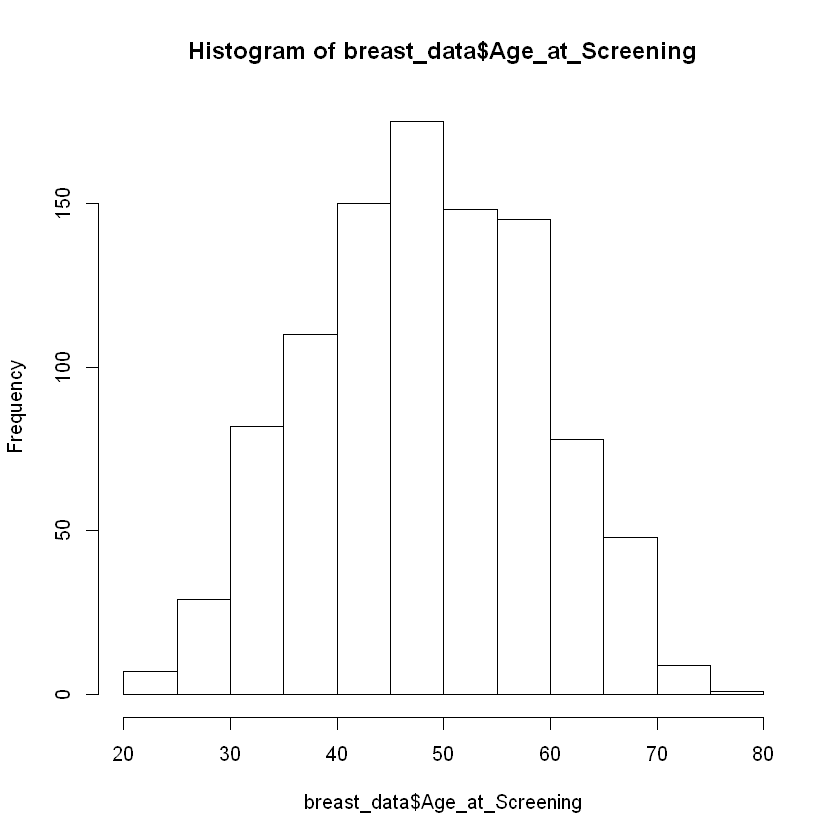

In [16]:
hist(breast_data$Age_at_Screening)

Histograms can be used to show the spread of numerical data. We use <code>bins</code>/<code>buckets</code> to divide the range of values into logical intervals/ranges. The y-axis (vertical) shows the count or percentage of data in each column. This can be used to give an overall impression of the distribution of the different variables (columns/features) in a data set.

<div class="alert alert-danger">
<b>Note:</b> Many statistical tests make assumptions about the underlying distribution of variables. Therefore it is essential to explore this before applying tests.
</div>

When working with data it is important to be familiar with some of the commonly occurring distributions that are encountered. Take a look at this resource <a href="https://seeing-theory.brown.edu/probability-distributions/index.html" target="_blank">Probability Distributions</a> and specifically the <code>normal</code>, <code>uniform</code>, <code>bernoulli</code> and <code>poisson</code> distributions.

The <code>central limit theorem</code> states that in many cases, the sum (sometimes average) of independent random variables tends towards a <code>normal distribution</code>. This is also sometimes called a <code>Gaussian</code> distribution or simply a <code>bell curve</code> due to the shape it forms. Many statistical tests assume that the distribution of data follows this (or a similar) distribution (e.g. t-tests, analysis of variance ANOVA and linear regression). If this is not the case, there are non-parametric equivalents of these tests for non-normally distributed data that usually apply ranking of data points (e.g. Mann-Whitney U tests, Friedman/Kruskal Wallis tests etc.). This is why examination of the underlying data distribution is essential before applying certain statistical tests that are based on assumptions about the underlying data. We don't cover running/applying statistical analysis in this unit as we are more concerned with ensuring the data is in the correct format and representation in order to do these tests.

<img src="./images/normal.png" width="30%" align="center" />

We can use a few functions in Python to recreate a normal distribution for reference. Again don't worry about understanding the code at this stage we will break this down when we create our own visualisations later. 

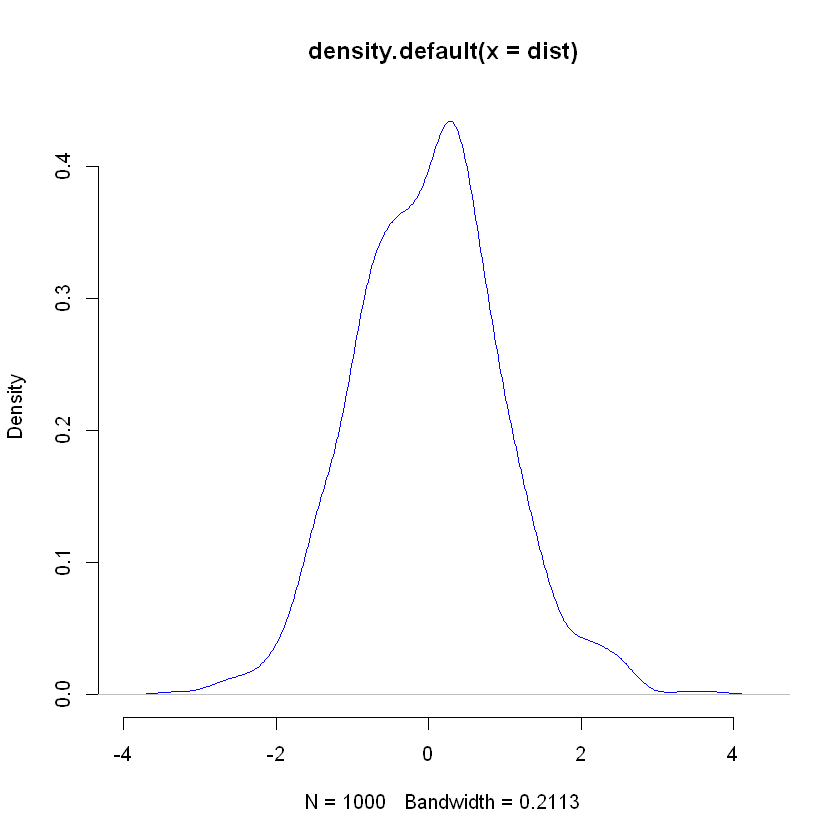

In [18]:
dist <- rnorm(1000)
den <- density(dist)
plot(den, frame=FALSE, col="blue")

The plot above is called a <code>density</code> plot (kernel density plot) and is also frequently used to explore the distribution of data. It shows the distribution of data over a time period or series of intervals. It works like a histogram but smooths the the noise using something called kernel smoothing. This kind of plot is better for showing the shape of the data. The shape is often an important feature and has certain mathematical properties. 

The following plot shows negatively skewed data. You can determine a positive or negative skew by looking at the tail of the distribution. If the tail is pointing to the lower end of the numbers (to the left) then it is negatively skewed. If the tail points to the right it is positively skewed.

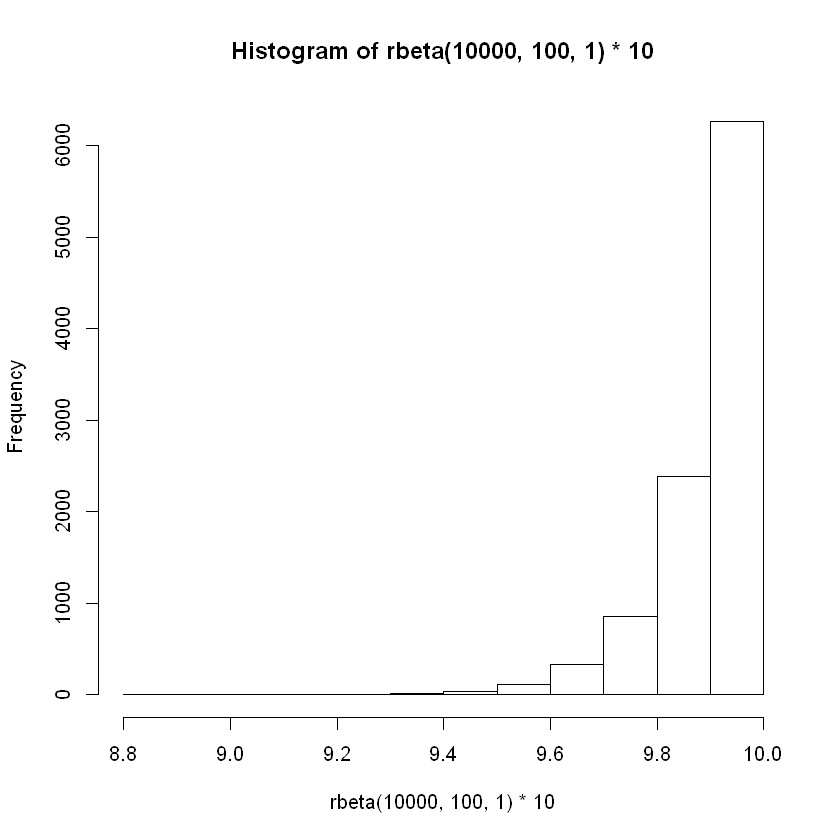

In [19]:
set.seed(5)
hist(rbeta(10000, 100, 1) * 10)

This next plot shows positively skewed data.

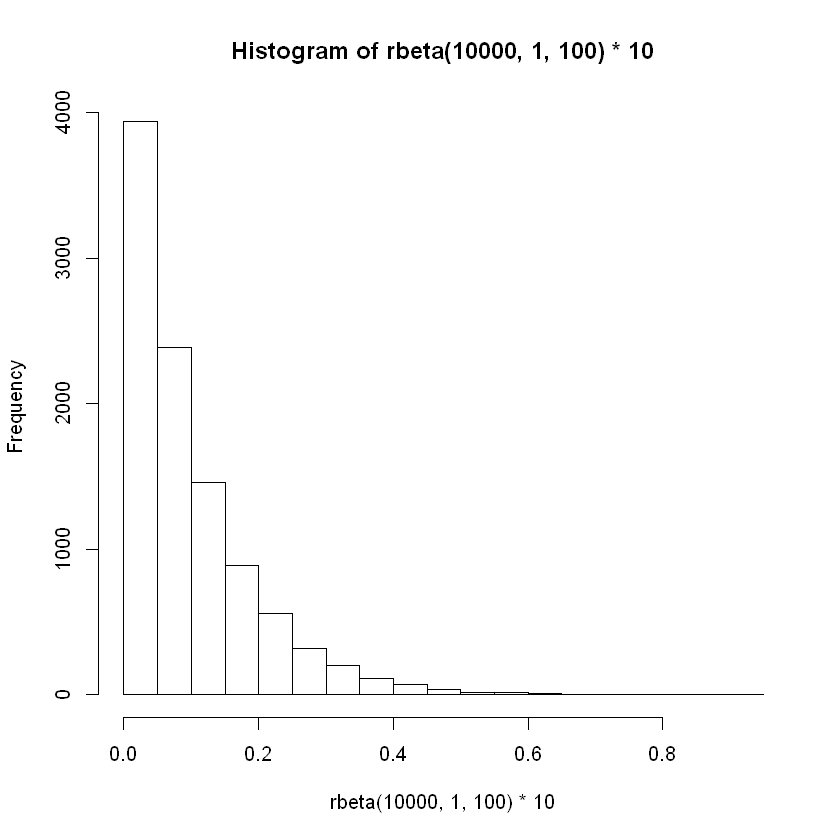

In [20]:
hist(rbeta(10000, 1, 100) * 10)

<div class="alert alert-success">
<b>Note:</b> We can convert data so that it has a mean of 0 and a standard deviation of 1 using something called <code>z-scores</code>. This works by taking each value ($x$) and subtracting from the mean (of all values). This centres the data around 0. This is then divided by the standard deviation. 
    $$ z = \frac{x-\bar{x}}{sd} $$
</div>

<div class="alert alert-block alert-info">
<b>Task 2:</b>
<br> 
    With regard to the <code>breast_data</code> above.<br>
    1. What are the names of the distributions for the fields ('Patient_ID', 'Arm', 'HR', 'HER2', 'MP', 'pCR', 'Age_at_Screening') presented in the histograms above?<br>
    2. Why are we only seeing histograms for some fields and not all them? What about 'Arm', 'Race', 'menopausal_status' and 'ethnicity'?    
<br><br>
    <strong>HINT:</strong> You may want to refer to the <a href="https://seeing-theory.brown.edu/probability-distributions/index.html" target="_blank">Probability Distributions</a> resource mentioned previously to check your answers.
</div>

The distributions are:
- Patient_ID = Uniform
- HR = Bernoulli
- HER2 = Bernoulli
- MP = Bernoulli
- pCR = Bernoulli
- Age_at_Screening = Normal (Gaussian)

Another plot that is often used to assess normality is the normal <code>QQ plot</code>. This shows the expected values (theoretical) against the actual values seen if the distribution were normal. If data is normal the data points should roughly follow the diagonal line (in red in the plot below). 

To test this we can make up some random data using the <code>rnorm</code> function. This ensures that the generated data follows a 'normal' distribution. Finally we plot the data with the <code>qqplot</code> function adding as 45&deg; line.

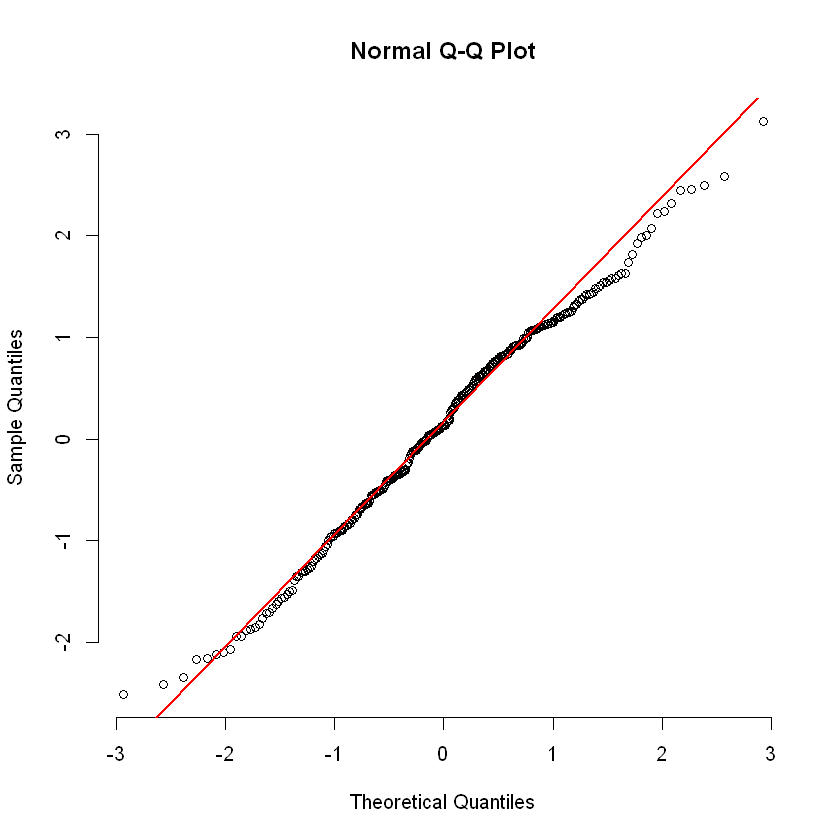

In [21]:
plot_data <- rnorm(300)
qqnorm(plot_data, pch=1, frame=FALSE)
qqline(plot_data, col="red", lwd=2)

As we can in the plot above, the data is normally distributed as expected. The black data points closely follow the red line. Let's see if this is the case with a different data set.

In [23]:
alpine_df <- read_csv("./data/alpine.csv")
head(alpine_df, 10)

Parsed with column specification:
cols(
  Distance = col_double(),
  `Mountain daisies` = col_double(),
  Tussock = col_double(),
  `Bog Pine` = col_double(),
  Inaka = col_double(),
  `Mountain Beech` = col_double()
)


Distance,Mountain daisies,Tussock,Bog Pine,Inaka,Mountain Beech
0,0,2,0,0,0
2,0,3,1,0,0
4,0,4,3,2,0
6,0,5,1,3,0
8,3,3,2,2,0
10,4,2,0,4,0
12,8,1,0,5,0
14,8,0,0,3,2
16,7,0,0,2,3
18,5,0,0,0,1


In the example below we can see that the data is <strong>not</strong> normally distributed. 

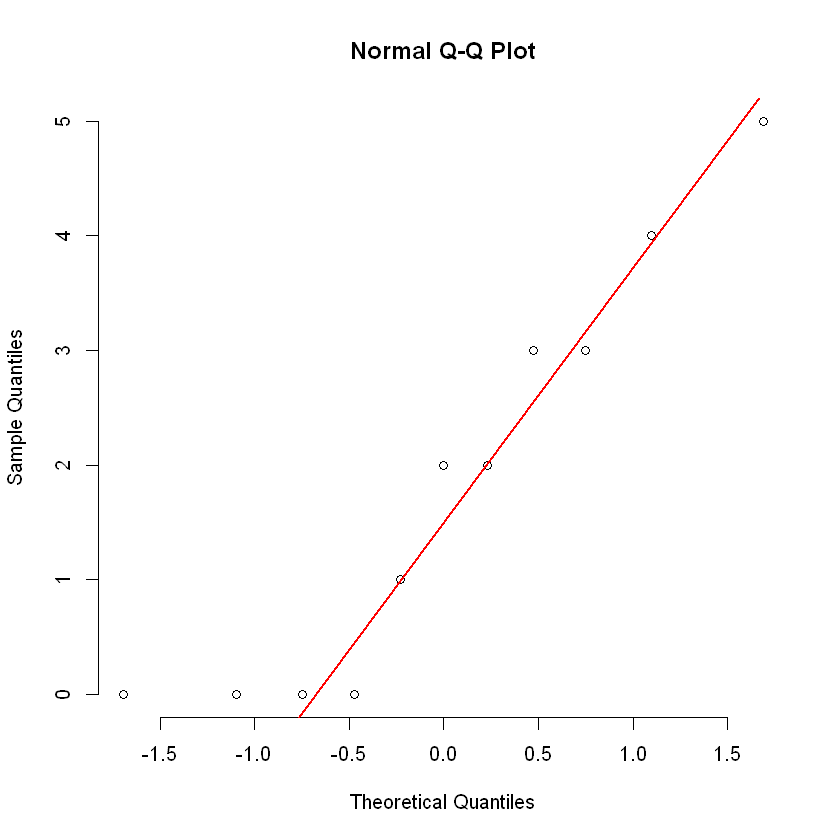

In [28]:
alpine_plot_data <- alpine_df$Tussock
qqnorm(alpine_plot_data, pch=1, frame=FALSE)
qqline(alpine_plot_data, col="red", lwd=2)

We can also plot a histogram to check. As you can see below this also indicated the data is not normally distributed. We could also confirm with additional statistical checks if we needed to provide additional quantitative evidence.

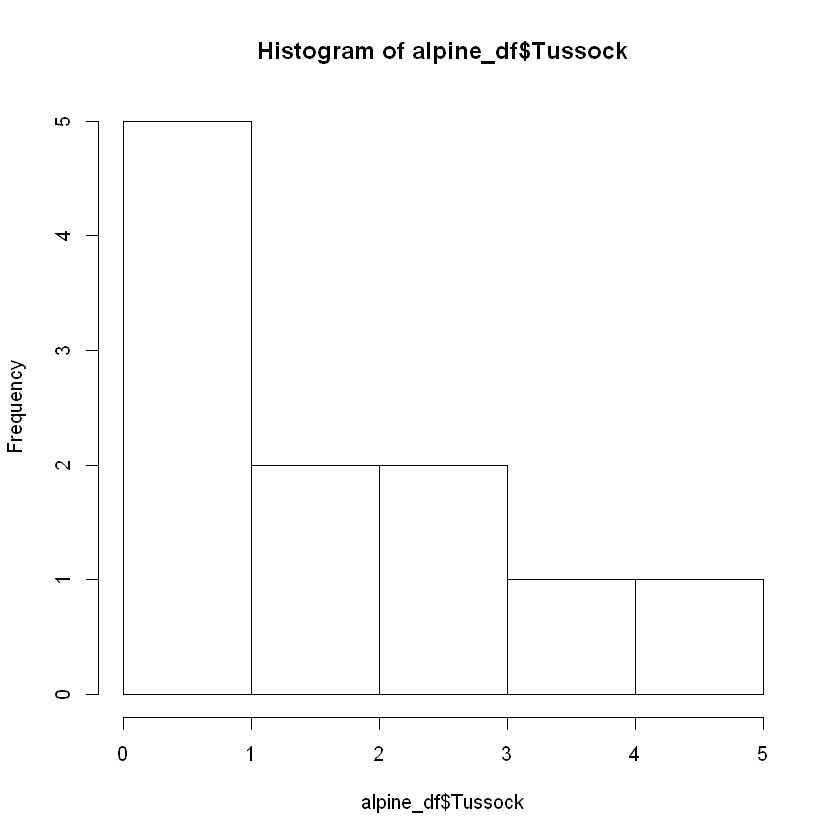

In [29]:
hist(alpine_df$Tussock)

<div class="alert alert-success">
<strong>Note:</strong> Other methods for exploring normal distribution of data include:<br>
    <ul>
        <li>Looking at the Skew and Kurtosis</li>
        <li>Plotting a histogram</li>
        <li>A density plot</li>
        <li>A QQ (Quantile-Quantile) plot</li>
        <li>Using a statistical test i.e. Shapiro-Wilk test</li>
    </ul>
    <br />
    It is often useful to use a combination of these methods to test for normality in a dataset.
</div>

Let's take a look at a different example using some data from an accident and emergency department (emergency room):

In [31]:
ae_data <- read.csv("./data/A and E Data.csv")
head(ae_data, 5)

Arrival.Month,day_type,Arrival.Day,Arrival.Hour,Arrival_Date_Time,Departure_Date_Time,Mins.on.AE,arrival_date_dt,Over.4.hrs,X4.to.12.hrs,...,Triage_Main_Code,Triage_Colour,Source_Of_Ref,Arrival_Mode,Attendance_Disposal,presenting_complaint,Attendance_Category,Arrival_To_Seen,Time_To_Initial_Asessment,Arrival_Mode_Code
Jun-12,Weekday,Fri,0,01-06-12 00:35,01-06-12 04:29,234,01-Jun-12,0,0,...,3,YELLOW,Emergency Services,Ambulance,Admissions,Intoxicated,First Accident And Emergency Attendance,164,1,1
Jun-12,Weekday,Fri,0,01-06-12 00:43,01-06-12 02:52,129,01-Jun-12,0,0,...,3,YELLOW,Self Referral,Ambulance,DNW,Chest pain,First Accident And Emergency Attendance,129,0,1
Jun-12,Weekday,Fri,0,01-06-12 00:48,01-06-12 04:45,237,01-Jun-12,0,0,...,4,GREEN,Self Referral,Private Transport,A&E Review Clinic,Wound,First Accident And Emergency Attendance,175,77,2
Jun-12,Weekday,Fri,0,01-06-12 00:57,01-06-12 04:55,238,01-Jun-12,0,0,...,3,YELLOW,Self Referral,Ambulance,Admissions,Urine Problem,First Accident And Emergency Attendance,117,0,1
Jun-12,Weekday,Fri,1,01-06-12 01:02,01-06-12 05:01,239,01-Jun-12,0,0,...,4,GREEN,Self Referral,Ambulance,Admissions,Shoulder injury,First Accident And Emergency Attendance,161,0,1


Another useful plot for looking at the distribution of several numerical variables is the <code>box and whisker</code> or <code>boxplot</code>. Let's subset the numerical data from the categorical data like so:

In [32]:
num_subset <- ae_data %>% select(c("Mins.on.AE", "Arrival_To_Seen", "Time_To_Initial_Asessment"))

We can see the data types are numeric <code>int</code>.

In [33]:
str(num_subset)

'data.frame':	230 obs. of  3 variables:
 $ Mins.on.AE               : int  234 129 237 238 239 240 35 238 114 171 ...
 $ Arrival_To_Seen          : int  164 129 175 117 161 208 35 0 114 146 ...
 $ Time_To_Initial_Asessment: int  1 0 77 0 0 2 12 0 7 0 ...


In [34]:
head(num_subset, 5)

Mins.on.AE,Arrival_To_Seen,Time_To_Initial_Asessment
234,164,1
129,129,0
237,175,77
238,117,0
239,161,0


Below is an image displaying the anatomy of a boxplot. It shows the min and max values, median value and quartile ranges. Outliers are represented as circles.

<img src="./images/bp.png" align="left" />

<strong>Source:</strong> towardsdatascience.com

Let's see one in action with the A&E data. By default it displays numbers (e.g. 1, 2 and 3). 

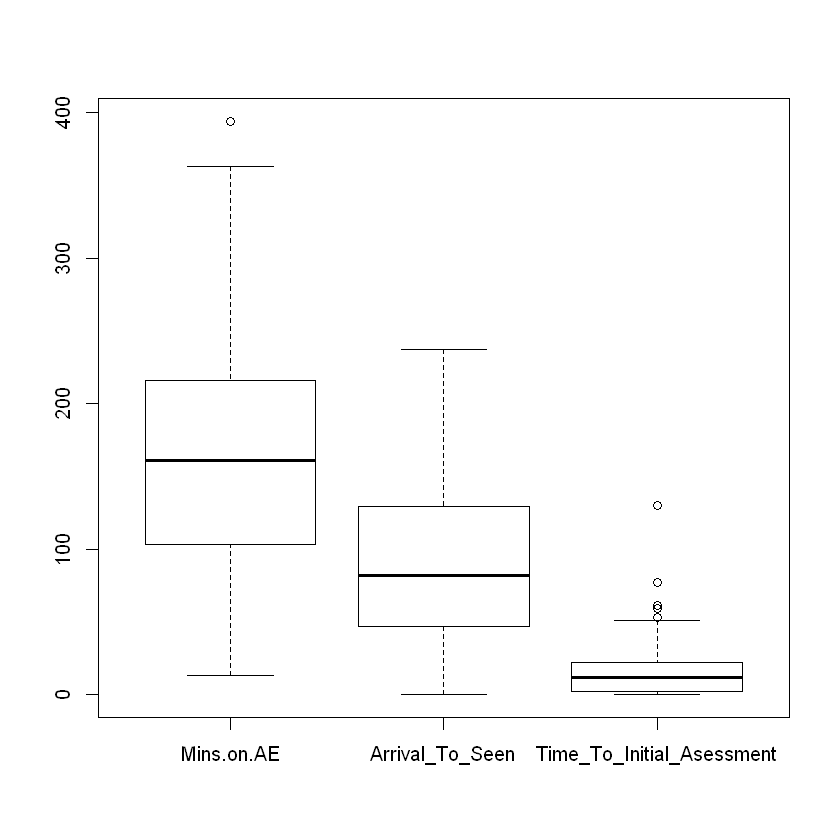

In [35]:
boxplot(num_subset)

A visualisation that shows similar information but better shows the shape of the data is a <code>violin</code> plot. You can see an example of one below on the same data from the <code>ggplot2</code> library. Here we first process the data by transforming it into two columns. The first contains the three column names and the next the values. The result of this is piped into the plotting function using the pipe operator <code>%&gt;%</code>. We also add a box plot to the violin plot to combine the value of the different information being shown.

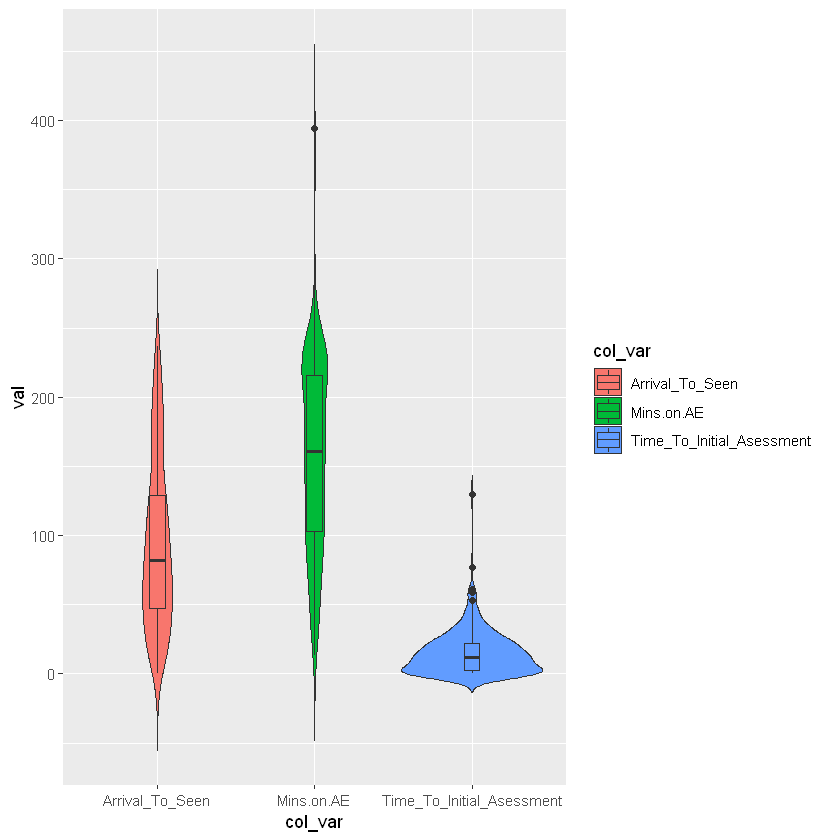

In [43]:
processed_data <- num_subset %>% 
    gather(Mins.on.AE, Arrival_To_Seen, Time_To_Initial_Asessment, key=col_var, value=val) %>% 
    ggplot(aes(x=col_var, y=val, fill=col_var)) +
        geom_violin(trim=FALSE) +
        geom_boxplot(width=0.1)
processed_data

<a id="meaning"></a>
#### 2.3 Meaningful visualisations

Sometimes there is just too much data to sensibly visualise (or at least with certain types of plot). Also for the analysis and modeling of data, you may only be interested in a portion of the relevant data. For this we need to extract a <code>subset</code> of the data. Let's say we are only interested in the number of <code>Type 1</code> attendances that are greater than 0 for particular organizations. Here we extract just the columns <code>Org name</code> and <code>Number of A&amp;E attendances Type 1</code>.

In [44]:
ae_dataset <- read.csv("./data/January-2020-CSV-js7fh.csv")
head(ae_dataset, 2)

Period,Org.Code,Parent.Org,Org.name,Number.of.A.E.attendances.Type.1,Number.of.A.E.attendances.Type.2,Number.of.A.E.attendances.Other.A.E.Department,Number.of.attendances.over.4hrs.Type.1,Number.of.attendances.over.4hrs.Type.2,Number.of.attendances.over.4hrs.Other.A.E.Department,Patients.who.have.waited.4.12.hs.from.DTA.to.admission,Patients.who.have.waited.12..hrs.from.DTA.to.admission,Emergency.admissions.via.A.E...Type.1,Emergency.admissions.via.A.E...Type.2,Emergency.admissions.via.A.E...Other.A.E.department,Other.emergency.admissions
MSitAE-JANUARY-2020,NR3,NHS ENGLAND MIDLANDS (NORTH MIDLANDS),NOTTINGHAM CITYCARE PARTNERSHIP,0,0,5223,0,0,3,0,0,0,0,0,0
MSitAE-JANUARY-2020,RPC,"NHS ENGLAND SOUTH EAST (KENT, SURREY AND SUSSEX)",QUEEN VICTORIA HOSPITAL NHS FOUNDATION TRUST,0,0,987,0,0,1,0,0,0,0,11,283


Here is a subset stored in a variable called <code>type1</code>. This contains the organisations name and the number of type 1 attendances in A&E.

In [47]:
type1 <- ae_dataset %>% select(c("Org.name", "Number.of.A.E.attendances.Type.1"))
head(type1, 10)

Org.name,Number.of.A.E.attendances.Type.1
NOTTINGHAM CITYCARE PARTNERSHIP,0
QUEEN VICTORIA HOSPITAL NHS FOUNDATION TRUST,0
WOKING WALK IN CENTRE,0
ASHFORD WALK-IN-CENTRE,0
PUTNOE MEDICAL CENTRE WALK IN CENTRE,0
NORWICH PRACTICES LTD,0
LATHAM HOUSE MEDICAL PRACTICE,0
SOUTHPORT AND ORMSKIRK HOSPITAL NHS TRUST,7136
WORKINGTON HEALTH LIMITED,0
GLOUCESTERSHIRE HEALTH AND CARE NHS FOUNDATION TRUST,0


Theres quite a lot of data with a zero value making the total number of rows 232.

In [48]:
nrow(type1)

[1] 232

Let's filter it further by only retaining data that is greater than (>) 0.

In [49]:
type1_filtered <- type1 %>% filter(Number.of.A.E.attendances.Type.1 > 0)
head(type1_filtered, 10)

Org.name,Number.of.A.E.attendances.Type.1
SOUTHPORT AND ORMSKIRK HOSPITAL NHS TRUST,7136
NORTH MIDDLESEX UNIVERSITY HOSPITAL NHS TRUST,9432
HULL UNIVERSITY TEACHING HOSPITALS NHS TRUST,10922
NORTHERN DEVON HEALTHCARE NHS TRUST,3743
BLACKPOOL TEACHING HOSPITALS NHS FOUNDATION TRUST,5916
YEOVIL DISTRICT HOSPITAL NHS FOUNDATION TRUST,4773
BRIGHTON AND SUSSEX UNIVERSITY HOSPITALS NHS TRUST,13574
NORTH WEST ANGLIA NHS FOUNDATION TRUST,13366
POOLE HOSPITAL NHS FOUNDATION TRUST,5687
JAMES PAGET UNIVERSITY HOSPITALS NHS FOUNDATION TRUST,6465


This has reduced the amount of rows a lot.

In [50]:
nrow(type1_filtered)

[1] 133

Let's make a bar plot with this data.

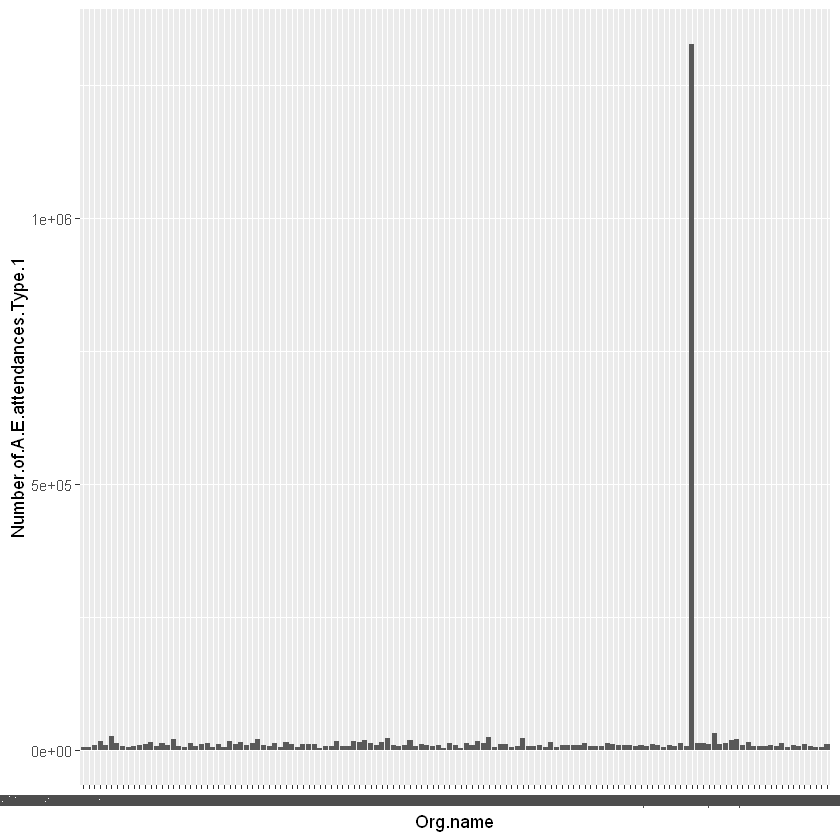

In [52]:
ggplot(type1_filtered, aes(x=Org.name, y=Number.of.A.E.attendances.Type.1)) +
    geom_bar(stat="identity")

<div class="alert alert-block alert-info">
<b>Task 3:</b>
<br> 
With reference to the very high value on the right of the plot:<br>
1. Look at the original data to try and determine where this very high value is coming from.<br/>
    2. <strong>Hint:</strong> use the <code>tail()</code> function that works like the <code>head()</code> but shows the last few records instead of the first few.
</div>

In [53]:
tail(type1_filtered)

,Org.name,Number.of.A.E.attendances.Type.1
128,ROYAL BERKSHIRE NHS FOUNDATION TRUST,10357
129,WIRRAL UNIVERSITY TEACHING HOSPITAL NHS FOUNDATION TRUST,7187
130,MAIDSTONE AND TUNBRIDGE WELLS NHS TRUST,13941
131,SHREWSBURY AND TELFORD HOSPITAL NHS TRUST,9422
132,FRIMLEY HEALTH NHS FOUNDATION TRUST,20216
133,TOTAL,1327226


Looks like they included the total in the data. We can drop this very high value to get a better look at the data. It still looks pretty messy though.

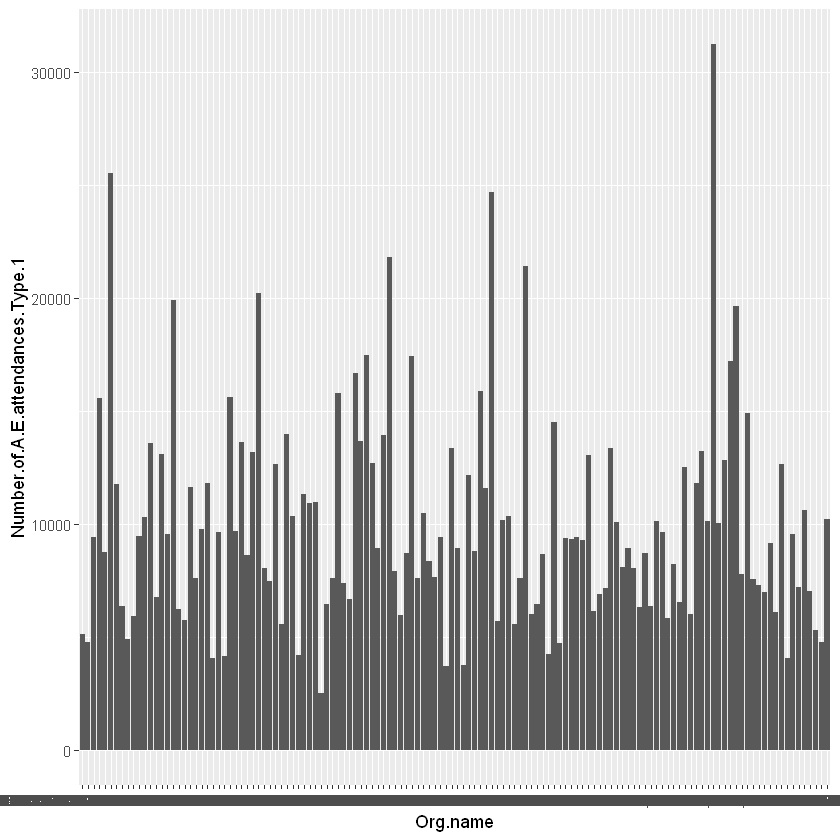

In [56]:
type1_filtered <- type1_filtered %>% filter(Org.name != 'TOTAL')
ggplot(type1_filtered, aes(x=Org.name, y=Number.of.A.E.attendances.Type.1)) +
    geom_bar(stat="identity")

We can look for the top 10 organisations with the most A&E attendances. We arrange by descending order using the <code>arrange</code> and <code>desc</code> functions and finally take a slice of 10 items using the <code>slice</code> function.

In [57]:
top_ten <- type1_filtered %>% 
    arrange(desc(Number.of.A.E.attendances.Type.1)) %>%
    slice(1:10)

If we try to just plot this data it still won't be ordered properly. We need to use the <code>reorder</code> option here to force the plot to order the bars correctly. Finally we will rotate the axis labels so they are readable.

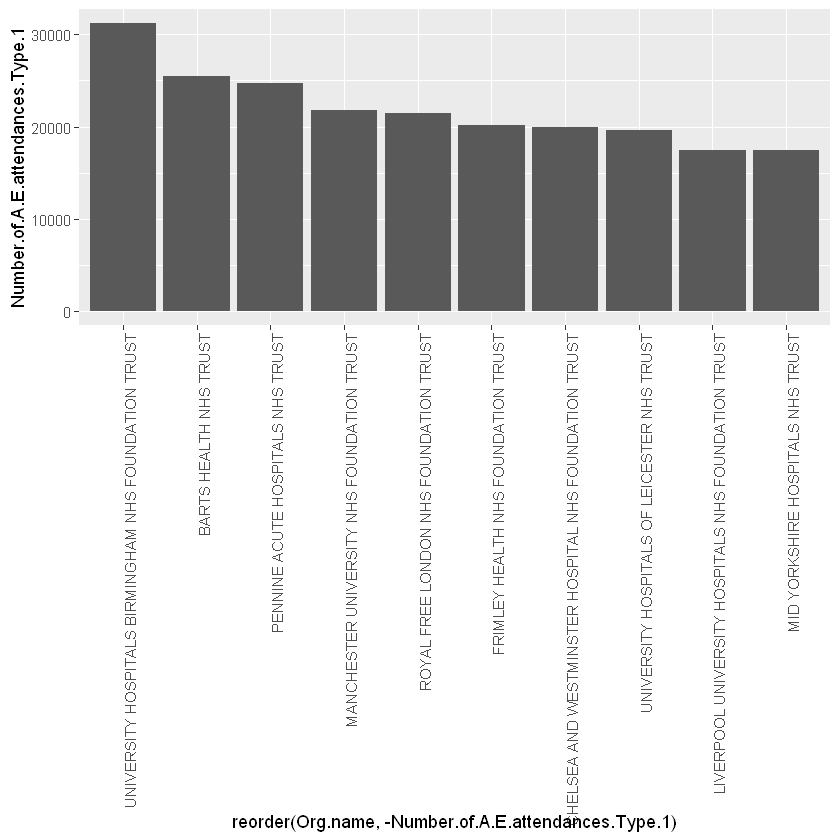

In [59]:
ggplot(top_ten, aes(x=reorder(Org.name, -Number.of.A.E.attendances.Type.1), y=Number.of.A.E.attendances.Type.1)) +
    geom_bar(stat="identity") +
    theme(axis.text.x=element_text(angle=90, hjust=1))

Sometimes you need to do a lot of filtering and sub-setting to achieve the required visualisation. Was this the best type of plot to show so much information? We could have opted for something like a scatter plot instead.

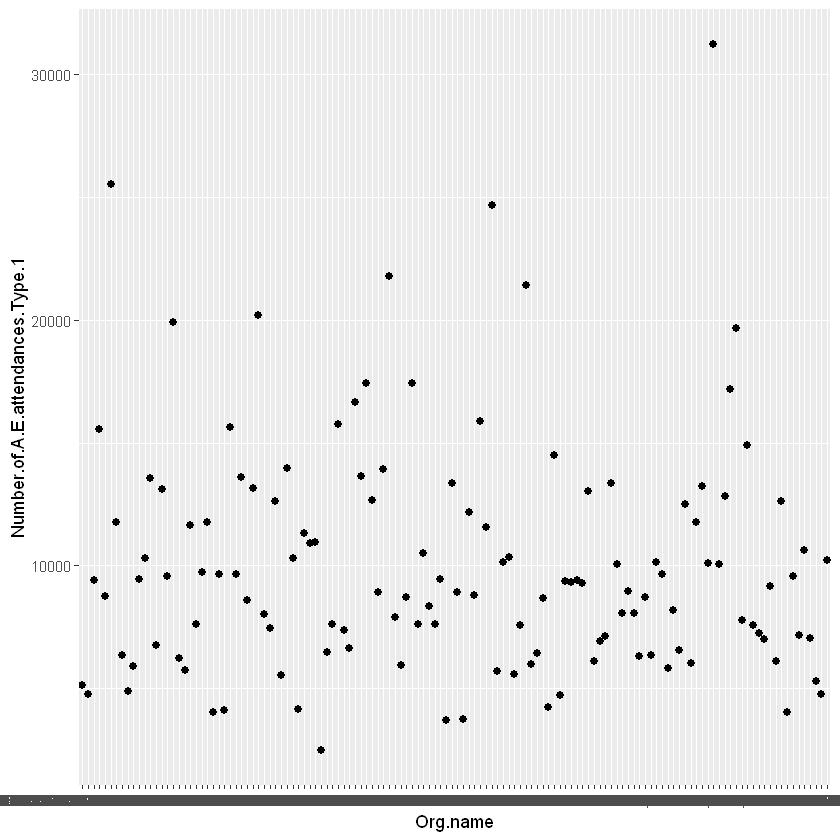

In [60]:
ggplot(type1_filtered, aes(x=Org.name, y=Number.of.A.E.attendances.Type.1)) +
    geom_point(size=2)

This is still a bit messy as we can't read all the organisation names. We could make it an interactive plot. Here we can hover over the data points to read the values.

In [69]:
library(plotly)
fig <- plot_ly(data=type1_filtered, x=~Org.name, y=~Number.of.A.E.attendances.Type.1)
fig

ERROR: Error in library(plotly): there is no package called 'plotly'


We will take a more detailed look at creating interactive plots in a later notebook.

<a id="corr"></a>
#### 2.4 Visualising relationships

Scatter plots can be a useful way of looking for relationships between variables. Let's see an example with some diabetes data. The <code>Class</code> columns shows the patients diabetic status (0 = no diabetes, 1 = diabetes).

In [70]:
db_data <- read.csv("./data/pima-indians-diabetes.csv")
head(db_data, 10)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
3,78,50,32,88,31.0,0.248,26,1
10,115,0,0,0,35.3,0.134,29,0
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.232,54,1
4,110,92,0,0,37.6,0.191,30,0


A <code>pairs plot</code> is a way of visualisaing very variable in a dataset against every other variable. R has a base version of this available via the <code>pairs</code>. 

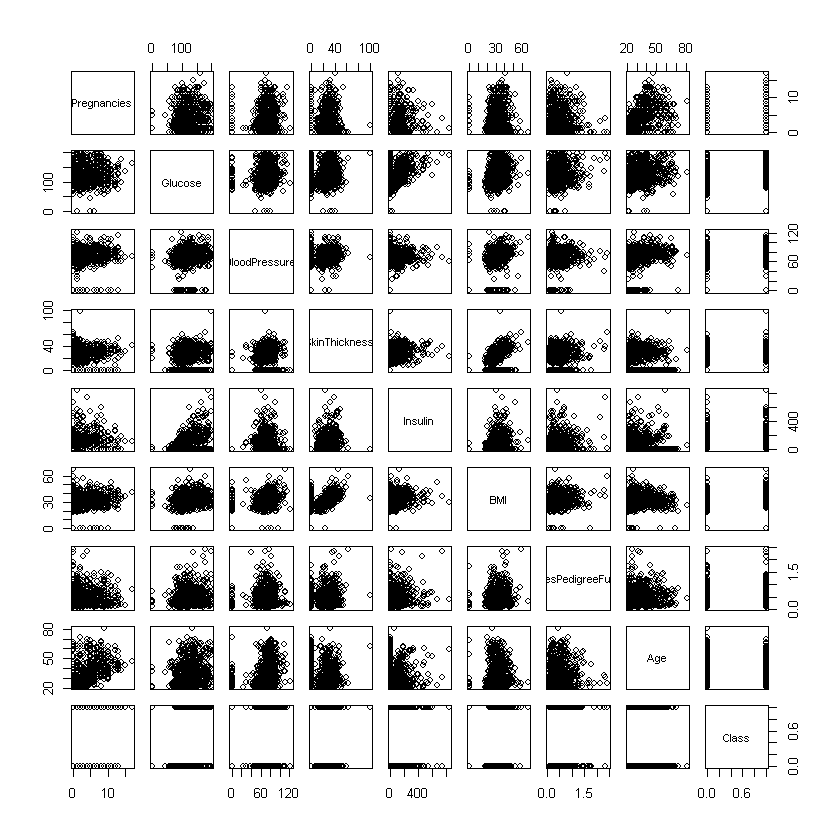

In [71]:
pairs(db_data)

Below is a statistical summary of the numerical data from the dataset above.

In [77]:
summary(db_data)

  Pregnancies        Glucose      BloodPressure   SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.0   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.0   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.0   Median :23.00  
 Mean   : 3.842   Mean   :120.9   Mean   : 69.1   Mean   :20.52  
 3rd Qu.: 6.000   3rd Qu.:140.0   3rd Qu.: 80.0   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.0   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2435           1st Qu.:24.00  
 Median : 32.0   Median :32.00   Median :0.3710           Median :29.00  
 Mean   : 79.9   Mean   :31.99   Mean   :0.4717           Mean   :33.22  
 3rd Qu.:127.5   3rd Qu.:36.60   3rd Qu.:0.6250           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
     Class       
 M

<div class="alert alert-block alert-info">
<b>Task 4:</b>
<br> 
Using the data above and any of the plot libraries you choose, create a boxplot for the dataset.
</div>

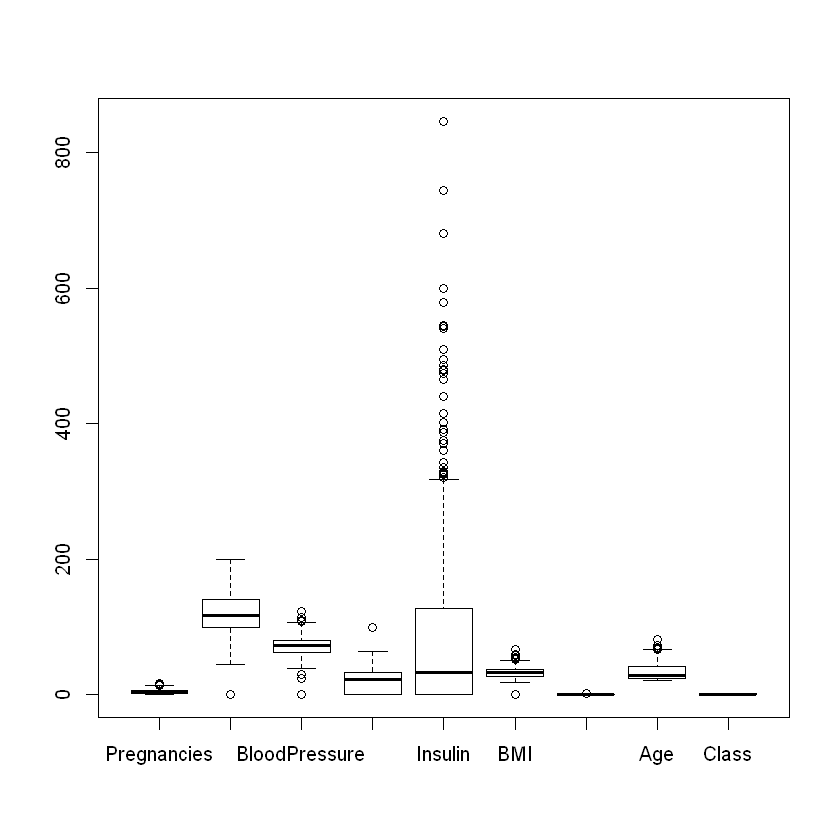

In [80]:
boxplot(db_data)

<a id="out"></a>
#### 2.5 Dealing with outliers

Below is an example from the <code>mammals</code> dataset. This is a built in dataset in the <code>MASS</code> package. We display this as a scatter plot below. As in this example, sometimes outliers (the data points in the top right) can dominate a plot and make it difficult to read. Most of the data is bunched up in the bottom left of the plot in this example.

In [89]:
data(mammals, package="MASS")

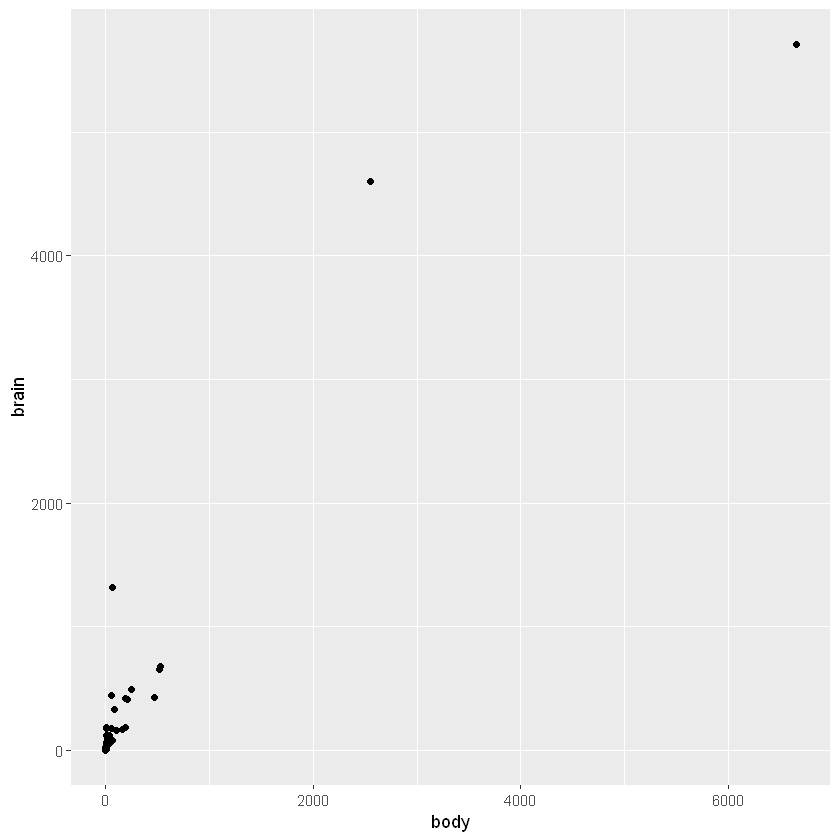

In [93]:
ggplot(mammals, aes(x=body, y=brain)) +
    geom_point()

One of the ways to deal with this is to perform a transformation. Transforming data refers to applying a mathematical function to the data to try and normalise the data. Three commonly used transformations include the <code>log transformation</code> $\text{log}(x_i)$, <code>square root transformation</code> $\sqrt{x_i}$, <code>reciprocal transformation</code> $\frac{1}{x_i}$. These 3 methods will help to deal with data that is positively skewed and also with unequal variance in the data. To deal with negatively skewed data one must first <code>reverse score</code> the data and then run one of aforementioned transformations. For more detailed information on how to transform skewed data see this towards data science article <a href="https://towardsdatascience.com/transforming-skewed-data-73da4c2d0d16" target="_blank">Transforming Skewed Data</a>.

We will apply a logarithmic (log) transformation to both the <code>x</code> and <code>y</code> variables and replot the plot above.

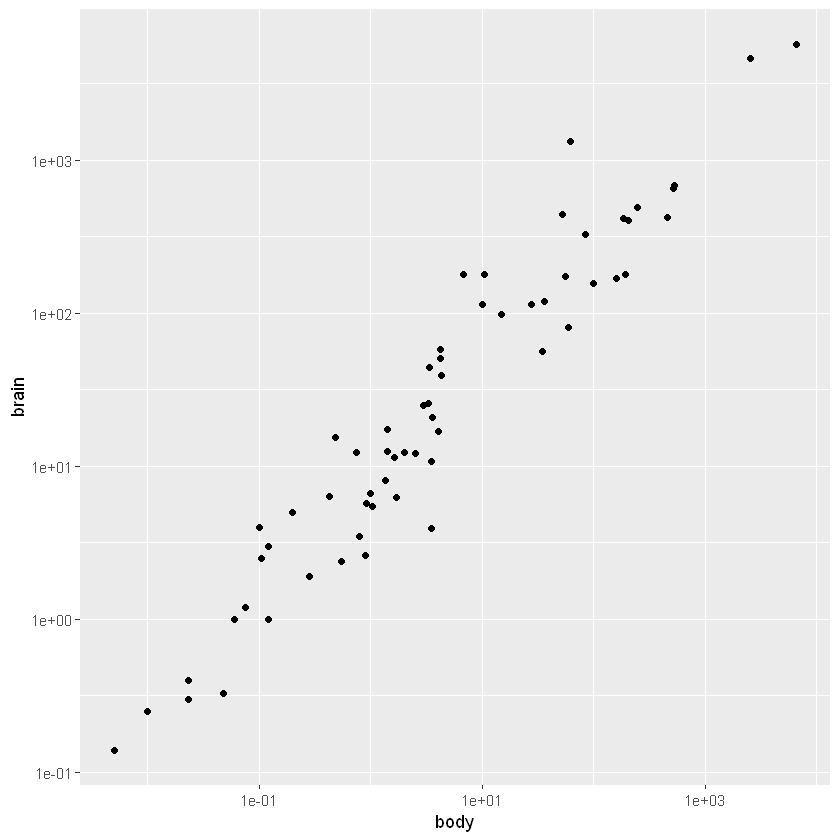

In [94]:
ggplot(mammals, aes(x=body, y=brain)) +
    geom_point() +
    scale_x_log10() +
    scale_y_log10()

The transformation makes it easier to see the data clearly. Here we can see a linear relationship between the variables.

<div class="alert alert-danger">
<b>Note:</b> You should be cautious about how you deal with outliers. Some people remove them but they can tell you important things about your data in many circumstances. The strategy you apply should be carefully considered on a case by case basis.
</div>

Here is a scatter plot from the diabetes data showing <code>Glucose</code> and Body Mass Index <code>BMI</code>. We also use <code>Class</code> to show with colour the difference between diabetes and no-diabetes. The first line specifies that the <code>Class</code> is a <code>factor</code>. This is categorical data, otherwise it is assumed to be continuous.

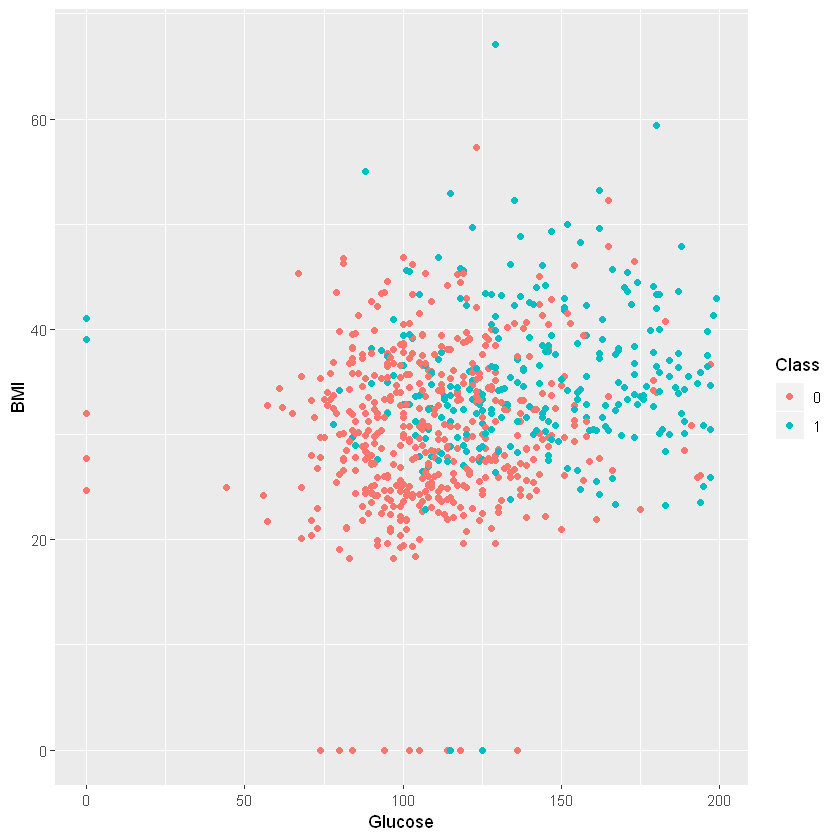

In [100]:
db_data$Class <- as.factor(db_data$Class)
ggplot(db_data, aes(x=Glucose, y=BMI)) +
    geom_point(aes(colour=Class))

<div class="alert alert-block alert-info">
<b>Task 5:</b>
<br> 
The plot above is missing a lot of context. What can you add to this to make it more readable? Replot the plot below with this missing context. Include a legend and label it with <code>Diabetes</code> and <code>No diabetes</code>.<br><br>
    <strong>HINT:</strong> You may want to look up <code>scale_color_manual</code>.
</div>

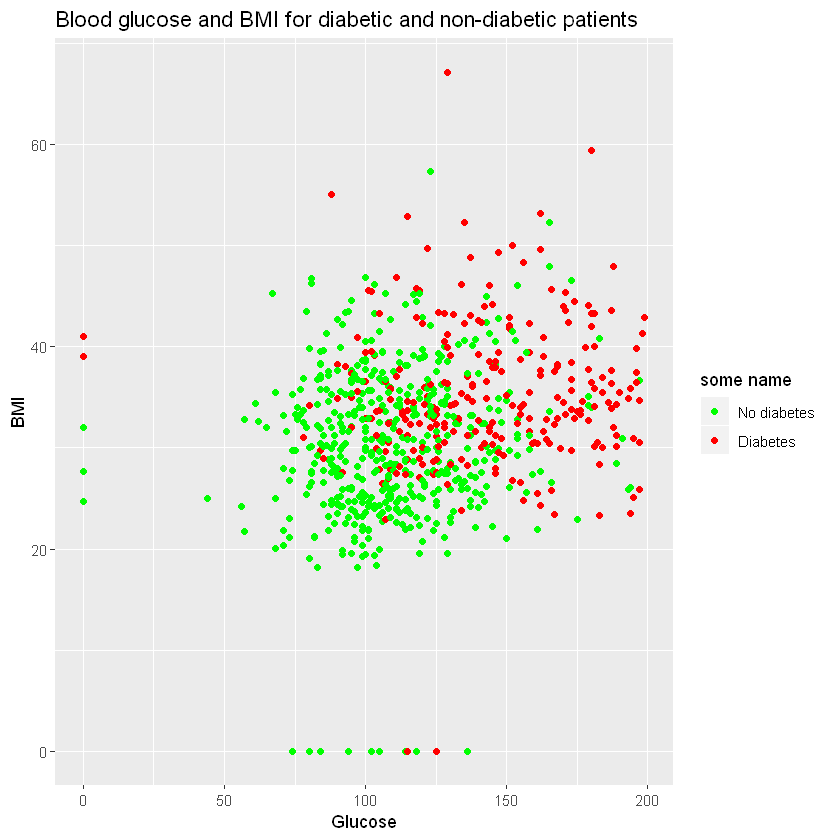

In [120]:
# Label the classes so they make sense
class_labels <- c('No diabetes','Diabetes')

# Create the scatter plot with title
ggplot(db_data, aes(x=Glucose, y=BMI)) +
    geom_point(aes(colour=Class)) +
    scale_color_manual(name="Diabetic status",
                       breaks=c(0,1), 
                       values=c('0'='green','1'='red'),
                       labels=class_labels) +
    ggtitle("Blood glucose and BMI for diabetic and non-diabetic patients")

The code below tells us how many records are labeled as <code>diabetes</code> and how many are <code>no_diabetes</code>.

In [125]:
db_summary <- db_data %>% count(Class) 
db_summary

Class,n
0,500
1,267


<div class="alert alert-block alert-info">
<b>Task 6:</b>
<br> 
    Given this information, display these results with a bar plot using the <code>ggplot()</code> function.<br>
</div>

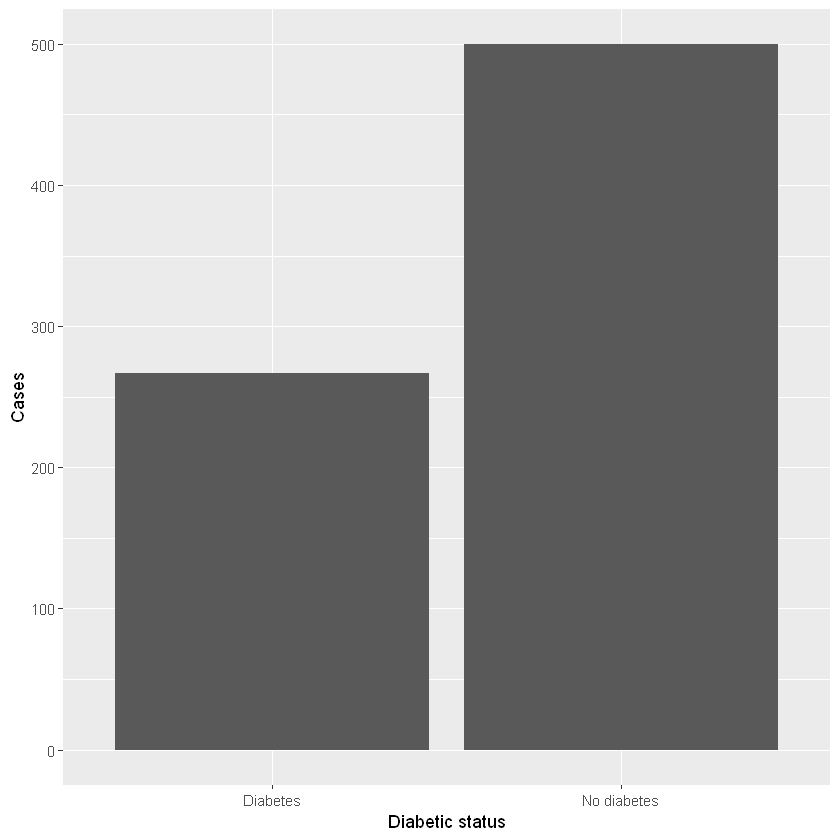

In [128]:
db_labels <- c("No diabetes", "Diabetes")
ggplot(db_summary, aes(x=db_labels, y=n)) +
    geom_bar(stat="identity") +
    xlab("Diabetic status") +
    ylab("Cases")

<a id="error"></a>
#### 2.6 Error bars

You will often see <code>error bars</code> on bar and line plots. Error bars usually show the 95% CI (Confidence Interval): $$CI = \hat{x} \pm z \frac{s}{\sqrt{n}} $$
$\hat{x}$ = Sample mean, $z$ = confidence level value, $s$ = sample standard deviation and $n$ = sample size. Essentially each time we take a sample from a population they will vary slightly. The CI gives us a range in which the population mean will fall. Therefore an error bar gives us the mean (usually a circle, square) and the range, the bars above and below the circle. The length between mean and the end of the bar represents 1.96 standard errors so the full length of the bar represents the 95% confidence interval of the mean. 

It's worth noting that error bars are not always representing the 95% CI, they can also represent the <code>standard error</code> or the <code>standard deviation</code>. 

<div class="alert alert-danger">
<strong>Note:</strong> It is best practice to state what the error bars represent in the caption of the plot.
</div>

Let's look at a quick example. Here is some (fictitious) data on the average number of students that selected a R programming class from the years 2021 to 2023.

In [131]:
y_2021 <- c(56, 53, 22, 53, 76, 45, 67, 54, 56, 66)
y_2022 <- c(46, 53, 54, 34, 87, 43, 35, 54, 64, 56)
y_2023 <- c(67, 64, 33, 65, 54, 35, 35, 62, 45, 47)

exam_data <- data.frame(year_2021=y_2021, year_2022=y_2022, year_2023=y_2023)
exam_data

year_2021,year_2022,year_2023
56,46,67
53,53,64
22,54,33
53,34,65
76,87,54
45,43,35
67,35,35
54,54,62
56,64,45
66,56,47


First here is the plot without the error bars. Just before plotting we need to reformat the data a bit switching it to long form and removing the <code>year_</code> part of the text from the <code>Year</code> column leaving just the year.

In [136]:
long_exam_data <- exam_data %>% gather(key='Year', value='Students', year_2021:year_2023)
long_exam_data$Year <- gsub("year_", "", as.character(long_exam_data$Year))
long_exam_data

Year,Students
2021,56
2021,53
2021,22
2021,53
2021,76
2021,45
2021,67
2021,54
2021,56
2021,66


Next we can group the values by the year and determine the mean and the standard error of the mean like so:

In [150]:
mean_groups <- long_exam_data %>% 
    group_by(Year) %>% 
    summarise(mean_students=mean(Students), 
              SEM=sd(Students)/sqrt(length(Students)))
mean_groups

Year,mean_students,SEM
2021,54.8,4.601449
2022,52.6,4.853864
2023,50.7,4.266276


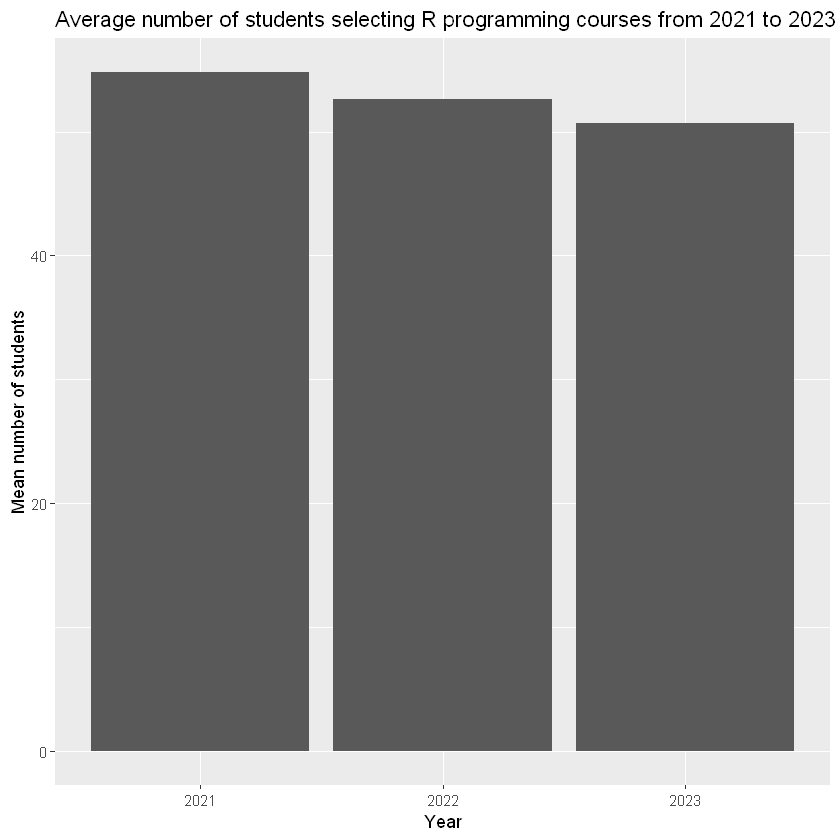

In [148]:
ggplot(mean_groups, aes(x=Year, y=mean_students)) +
    geom_bar(stat="identity") +
    ylab("Mean number of students") +
    ggtitle("Average number of students selecting R programming courses from 2021 to 2023")

<div class="alert alert-success">
<strong>Note:</strong> When comparing plots of averages (means), if the error bars do not overlap, there is more likely to be a statistically significant difference between the means.
</div>

The metric used (e.g. 95% CI, SEM, SD) needs to be calculated by you and then used with the <code>geom_errorbar</code> function. This differs slightly depending on which package you are using for your visualisations. Adding error bars to plots is not very straightforward or intuitive in most cases. Here is an example using the Standard error of the mean (SEM) which we calculated previously. This divides the samples standard deviation by the square root of the sample size ($SEM = \frac{s}{\sqrt{n}}$) to calculate the SEM for us.

You will note a few additions, as well as using the <code>geom_errorbar</code> function where we can set a colour and width of the bars, we also added a <code>ymin</code> and <code>ymax</code> to the <code>aes</code>. These specify the mean - the SEM and the mean + the SEM. This could be replaced with a different metric as appropriate (e.g. the standard deviation). 

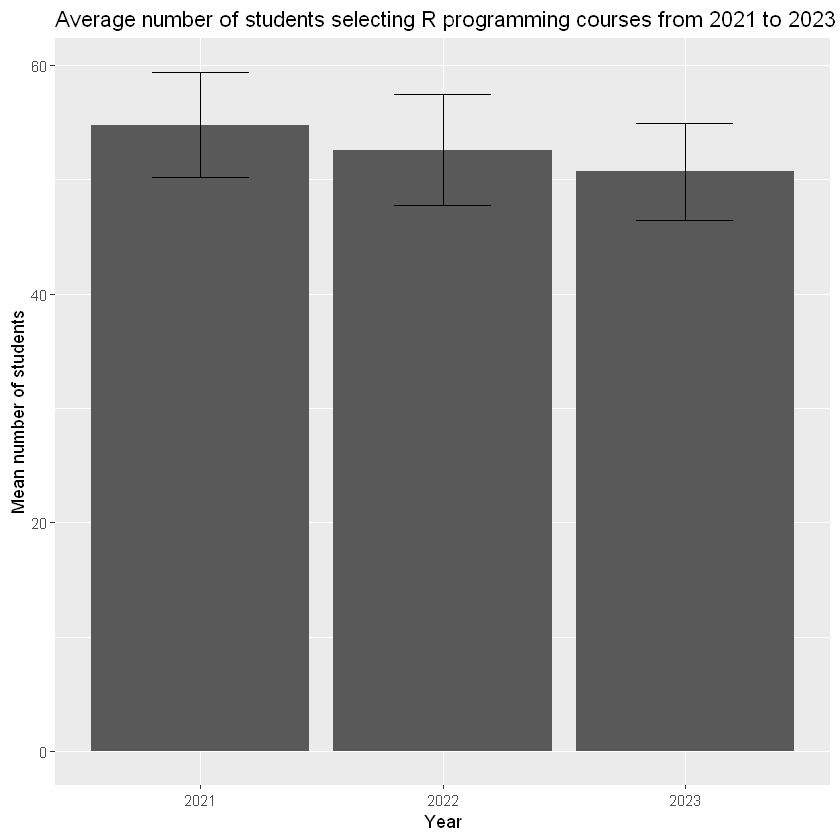

In [151]:
ggplot(mean_groups, aes(x=Year, y=mean_students, ymin=mean_students-SEM, ymax=mean_students+SEM)) +
    geom_bar(stat="identity") +
    geom_errorbar(colour="black", stat="identity", width=0.4) + 
    ylab("Mean number of students") +
    ggtitle("Average number of students selecting R programming courses from 2021 to 2023")

<strong>Fig 1.0</strong> Bar plot showing the average number students applying for an R coding course in the years 2021 to 2023 (NB: error bars represent the Standard error of the mean).

The example above shows an example of including this information in the plot caption.

<div class="alert alert-success">
<strong>Note:</strong> You can find further examples of using error bars, including the 95% CI <a href="http://www.cookbook-r.com/Graphs/Plotting_means_and_error_bars_(ggplot2)/" target="_blank">here</a> and <a href="https://jkzorz.github.io/2020/05/17/Error-bars.html" target="_blank">here</a>.
</div>    

There are lots of different types of plot that can be used for exploring data, some can be specific to the methods used (e.g. a PCA biplot). They can show characteristics, relationships, distributions and outliers. Plotting data before analysis is a useful first step in any analytics pipeline. Remember that the more context you can provide makes the plot easier to interpret. Much of this can be done easily by adding axis labels, titles, captions and error bars etc.

#### Feedback
Please rate this notebook by clicking on the image below (it will open up a new window where you can select one of the three icons)
 <a href="https://www.qualtrics.manchester.ac.uk/jfe/form/SV_7PAcxdWkdmW47lQ" target="_blank"><img src="./images/sentiment-check-icons.png" width="80%" /></a>

------

##### About this Notebook
<br>
<i>Notebook created by <strong>Dr. Alan Davies</strong>.
    
Publish date: July 2023<br>
Review date: July 2024</i>

## Notes: